In [5]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
from qiskit.providers.aer import noise
import numpy as np

In [7]:
qr = QuantumRegister(5,'qr')
cr = ClassicalRegister(5,'cr')
backend = Aer.get_backend('qasm_simulator')

In [54]:
def AND (input1,input2, q_1=0,q_2=1,q_out=2):
    # The keyword q_1 specifies the qubit used to encode input1
    # The keyword q_2 specifies    qubit used to encode input2
    # The keyword q_out specifies    qubit to be as output
    
    qc = QuantumCircuit(qr, cr)
    
    # prepare input on qubits q1 and q2
    if input1=='1':
        qc.x( qr[ q_1 ] )
    if input2=='1':
        qc.x( qr[ q_2 ] )
    
    qc.ccx(qr[ q_1 ],qr[ q_2 ],qr[ q_out ])
    qc.measure(qr[ q_out ],cr[0]) 
    job = execute(qc, backend, shots=1000)
    output = job.result().get_counts()
    
    return output

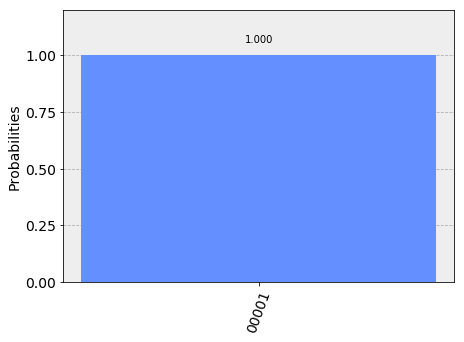

In [60]:
plot_histogram(AND('1','1'))